In [1]:
# Import required modules
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import norm
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("bright")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

['train.csv', 'merchants.csv', 'sample_submission.csv', 'test.csv', 'historical_transactions.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv']


In [2]:
# Load train / test data sets
train = pd.read_csv("../input/train.csv", dtype={"feature_1": "category", "feature_2": "category", "feature_3": "category"}, parse_dates=["first_active_month"])
test = pd.read_csv("../input/test.csv", dtype={"feature_1": "category", "feature_2": "category", "feature_3": "category"}, parse_dates=["first_active_month"])

In [3]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
train.describe(include='all')

,first_active_month,card_id,feature_1,feature_2,feature_3,target
count,201917,201917,201917,201917,201917,201917.000000
unique,75,201917,5,3,2,NaN
top,2017-09-01 00:00:00,C_ID_c342bc4836,3,1,1,NaN
freq,13878,1,73573,89242,114198,NaN
first,2011-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-0.393636
std,NaN,NaN,NaN,NaN,NaN,3.850500
min,NaN,NaN,NaN,NaN,NaN,-33.219281
25%,NaN,NaN,NaN,NaN,NaN,-0.883110


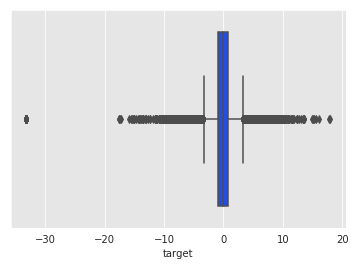

In [5]:
# Create seaborn boxplot of target variable distribution
sns.boxplot(train['target'], color=sns.color_palette("bright")[0])
plt.savefig("boxplot_target.svg", format="svg")

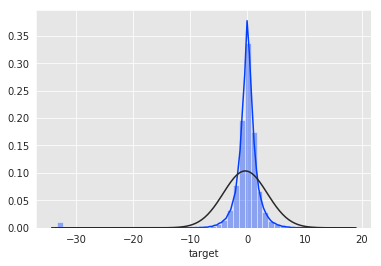

In [6]:
# Create seaborn distplot of target variable distribution
sns.distplot(train['target'], fit=norm, color=sns.color_palette("bright")[0])
plt.savefig("distplot.svg", format="svg")

In [7]:
train.skew()

target   -6.72016
dtype: float64

In [8]:
train.kurtosis()

target    55.031783
dtype: float64

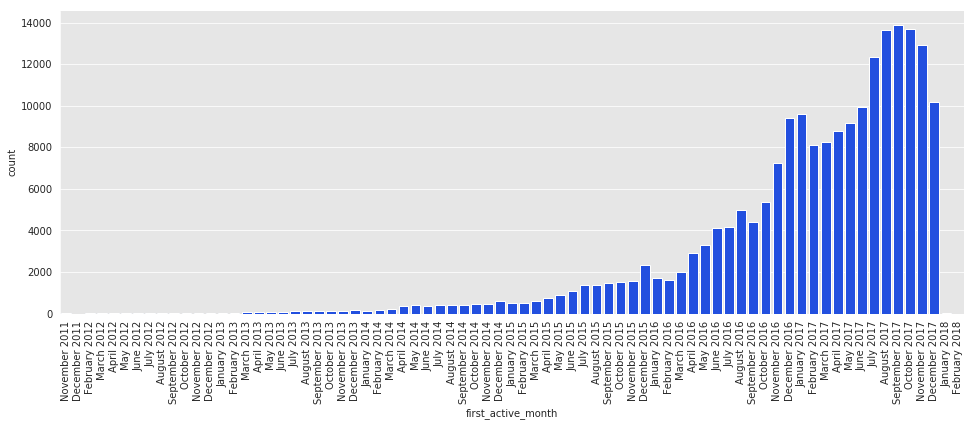

In [9]:
# Create seaborn category plot of first active month feature
sns.catplot(x='first_active_month', kind="count", data=train, color=sns.color_palette("bright")[0], height=5, aspect=3).set_xticklabels(labels=train['first_active_month'].value_counts().sort_index().index.strftime('%B %Y') ,rotation=90)
plt.savefig("catplot_first_active_month.svg", format="svg")

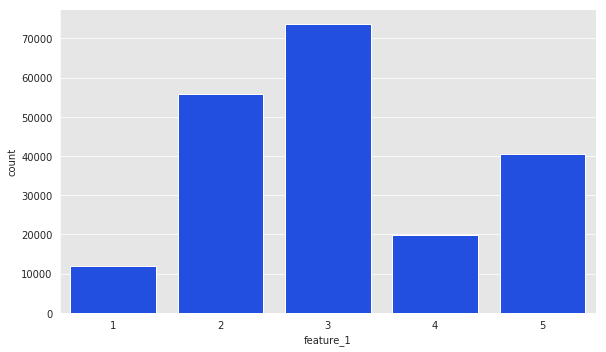

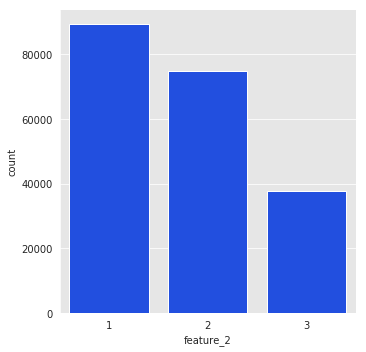

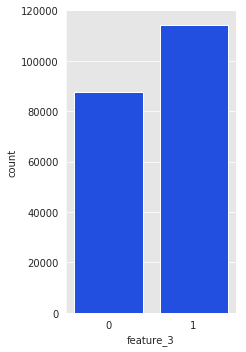

In [10]:
# Create seaborn category plot of feature_1, feature_2 & feature_3
sns.catplot(x='feature_1', kind="count", data=train, color=sns.color_palette("bright")[0], height=5, aspect=5/3)
plt.savefig("catplot_feature_1.svg", format="svg")
sns.catplot(x='feature_2', kind="count", data=train, color=sns.color_palette("bright")[0], height=5, aspect=3/3)
plt.savefig("catplot_feature_2.svg", format="svg")
sns.catplot(x='feature_3', kind="count", data=train, color=sns.color_palette("bright")[0], height=5, aspect=2/3)
plt.savefig("catplot_feature_3.svg", format="svg")

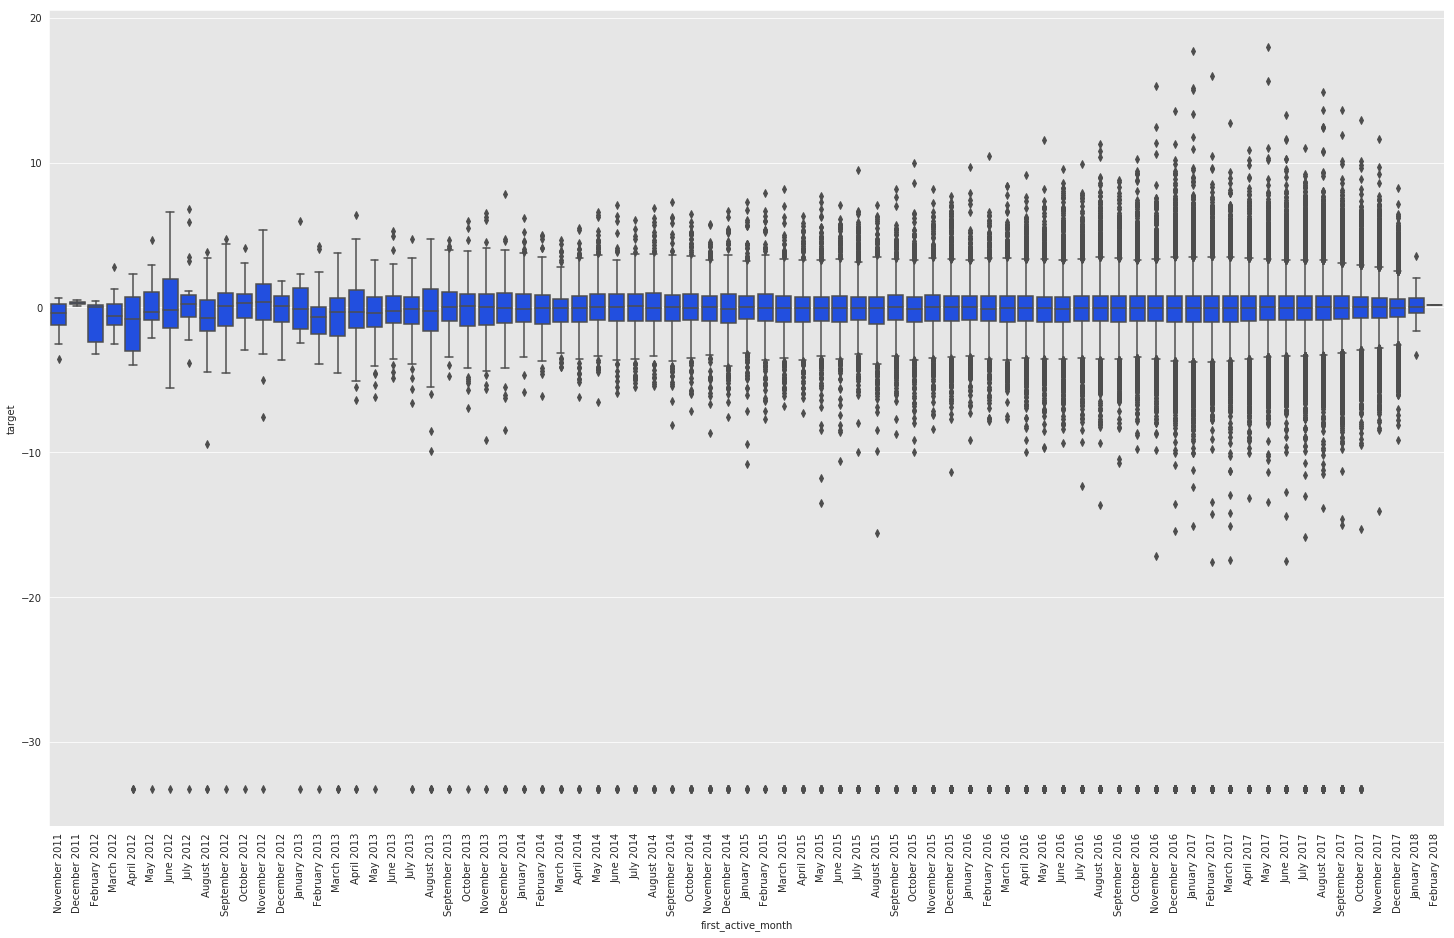

In [12]:
# Create seaborn boxplots of first active month feature
fig, ax = plt.subplots(figsize = (25, 15))
sns.boxplot(x='first_active_month', y='target', data=train, color=sns.color_palette("bright")[0]).set_xticklabels(labels=train['first_active_month'].value_counts().sort_index().index.strftime('%B %Y') ,rotation=90)
plt.savefig("violin_first_active_month.svg", format="svg")

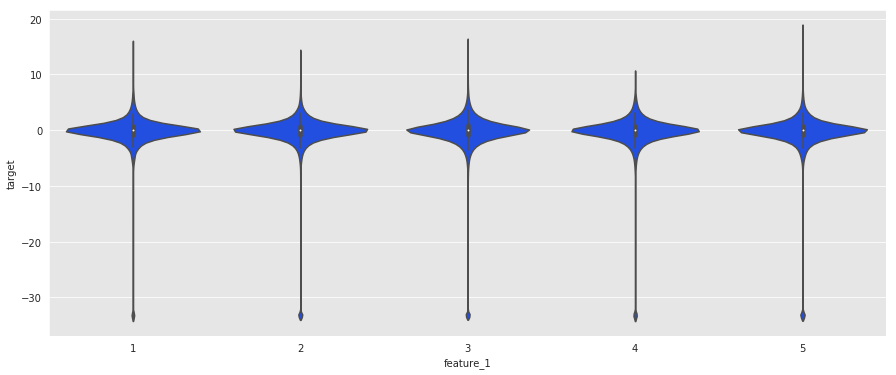

In [13]:
# Create seaborn violinplots of feature_1 vs target
fig, ax = plt.subplots(figsize = (15, 6))
sns.violinplot(x='feature_1', y='target', data=train, color=sns.color_palette("bright")[0])
plt.savefig("violin_feature_1.svg", format="svg")

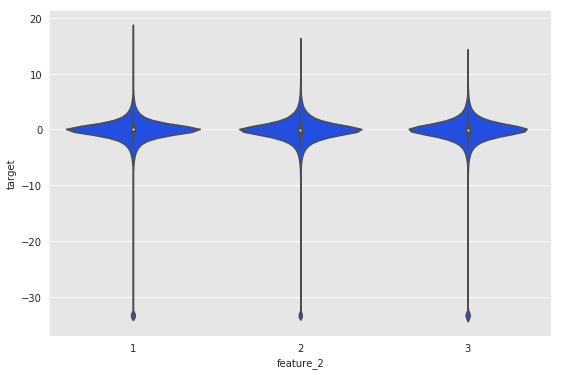

In [14]:
# Create seaborn violinplots of feature_2 vs target
fig, ax = plt.subplots(figsize = (9, 6))
sns.violinplot(x='feature_2', y='target', data=train, color=sns.color_palette("bright")[0])
plt.savefig("violin_feature_2.svg", format="svg")

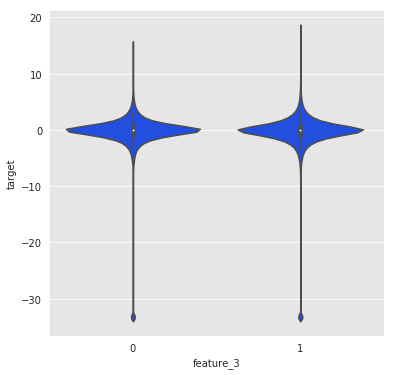

In [15]:
# Create seaborn violinplots of feature_3 vs target
fig, ax = plt.subplots(figsize = (6, 6))
sns.violinplot(x='feature_3', y='target', data=train, color=sns.color_palette("bright")[0])
plt.savefig("violin_feature_3.svg", format="svg")

### Test Data Set

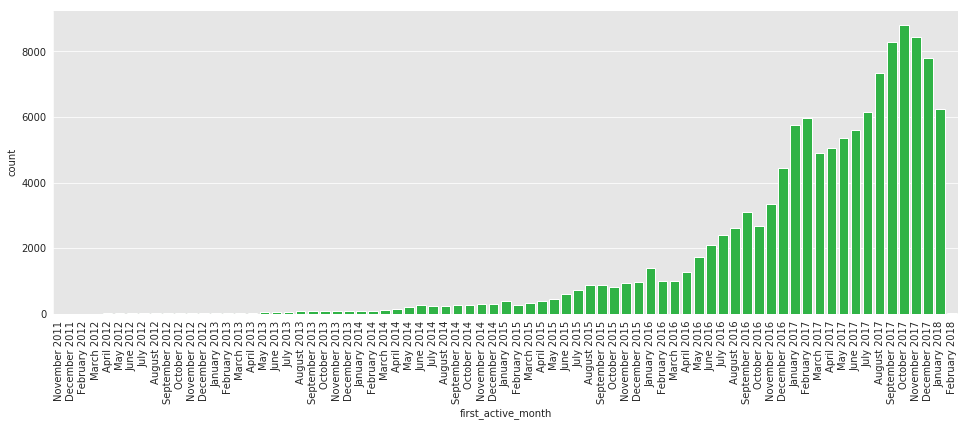

In [17]:
# Create seaborn category plot of first active month feature
sns.catplot(x='first_active_month', kind="count", data=test, color=sns.color_palette("bright")[2], height=5, aspect=3).set_xticklabels(labels=train['first_active_month'].value_counts().sort_index().index.strftime('%B %Y') ,rotation=90)
plt.savefig("catplot_first_active_month_test.svg", format="svg")

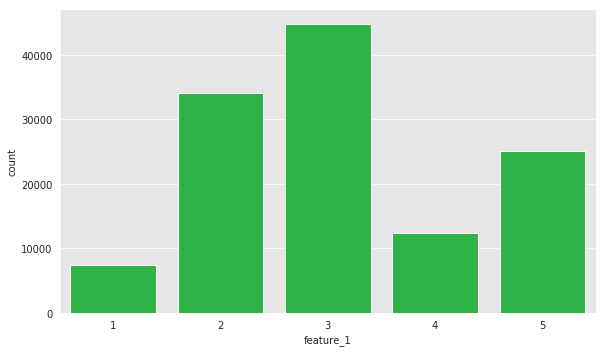

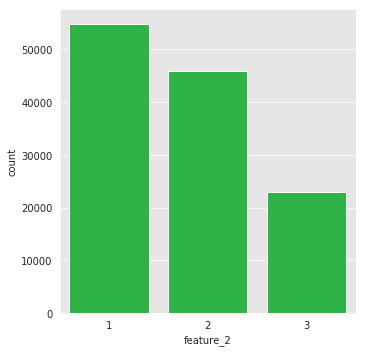

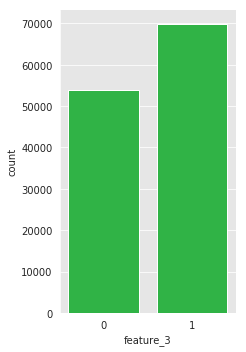

In [20]:
# Create seaborn category plot of feature_1, feature_2 & feature_3
sns.catplot(x='feature_1', kind="count", data=test, color=sns.color_palette("bright")[2], height=5, aspect=5/3)
plt.savefig("catplot_feature_1_test.svg", format="svg")
sns.catplot(x='feature_2', kind="count", data=test, color=sns.color_palette("bright")[2], height=5, aspect=3/3)
plt.savefig("catplot_feature_2_test.svg", format="svg")
sns.catplot(x='feature_3', kind="count", data=test, color=sns.color_palette("bright")[2], height=5, aspect=2/3)
plt.savefig("catplot_feature_3_test.svg", format="svg")